### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
import glob
import missingno as msno

### Read in the Dataset

In [2]:
# Point to data files location
path = "./scraper/data/6_23_2025/"
all_files = glob.glob(path + "*.json")

# Read all files into single dataframe
df_list = []
for file in all_files:
    df = pd.read_json(file)
    df_list.append(df)

# ignore_index resets index of combined DF to prevent index duplicates
raw_df = pd.concat(df_list, ignore_index=True) 

# Display entire data frame
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Examine and excerpt of data
raw_df.head(5)

,stockNumber,vin,year,make,model,body,trim,basePrice,originalPrice,hasPriceDrop,mileage,storeId,storeName,storeCity,state,stateAbbreviation,distance,averageRating,numberOfReviews,repairPalData,isNewArrival,isTransferable,features,highlightedFeatures,highlights,lastMadeSaleableDate,transferFee,transferTags,transferText,transferType,minEstimatedTransferDurationInDays,maxEstimatedTransferDurationInDays,transferTimesUnavailable,exteriorColor,interiorColor,normalizedExteriorColor,normalizedInteriorColor,transmission,review,numberOfFavorites,isSaleable,isComingSoon,isReserved,mpgCity,mpgHighway,originalBatteryRangeInMiles,cylinders,driveTrain,engineType,fuelType,horsepower,horsepowerRpm,engineSize,engineTorque,engineTorqueRpm,priorUseDescriptions,isAvailableToTransact,recommendationType,bestFinanceDecision,store,featureScore,vehicleSize,packages,types,series,isSavedCar,heroImageUrl,heroThumbnailImageUrl,isEVTaxCreditEligible
0,27461478,5NPEG4JA8NH134099,2022,Hyundai,Sonata,4D Sedan,SE,19998,NaN,False,56782,7298,Roswell,Roswell,Georgia,GA,2108.0,4.200000,5,NaN,False,True,"[Rear Defroster, Overhead Airbags, Auxiliary A...","Rear View Camera,Auxiliary Audio Input,Alloy W...","[singleOwner, warranty, fuelEfficient, advance...",2025-06-12T20:56:13.565Z,1999.0,"[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,9.0,22.0,False,Gray,Gray,NaN,NaN,Automatic,NaN,0,True,False,False,28.0,38.0,NaN,4,Front Wheel Drive,Gas,NaN,191.0,6100.0,2.5L,181.0,4000.0,"[{'id': 20, 'name': 'Leased Vehicle', 'descrip...",True,NaN,NaN,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",3.0,NaN,[],NaN,None,False,https://img2.carmax.com/assets/27461478/hero.j...,NaN,False
1,26070459,JTDEPMAE5NJ210260,2022,Toyota,Corolla,4D Sedan,LE,20998,NaN,False,33730,7298,Roswell,Roswell,Georgia,GA,2108.0,4.500000,22,NaN,False,True,"[Power Windows, Power Locks, Air Conditioning,...","Rear View Camera,Auxiliary Audio Input,Overhea...","[warranty, fuelEfficient, advancedFeatures]",2025-06-12T20:53:33.311Z,1999.0,"[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,9.0,22.0,False,Blue,Black,NaN,NaN,Automatic,NaN,0,True,False,False,30.0,38.0,NaN,4,Front Wheel Drive,Gas,NaN,139.0,6100.0,1.8L,126.0,3900.0,"[{'id': 10, 'name': 'Fleet', 'description': 'T...",True,NaN,NaN,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",7.0,NaN,[],NaN,None,False,https://img2.carmax.com/assets/26070459/hero.j...,NaN,False
2,27175122,3GCUDFE80RG128481,2024,Chevrolet,Silverado 1500,4D Crew Cab,LT Trail Boss,51998,NaN,False,58240,7298,Roswell,Roswell,Georgia,GA,2108.0,5.000000,1,NaN,False,True,"[Power Locks, Auxiliary Audio Input, AM/FM Ste...","Z71 Package,4WD/AWD,Leather Seats,BOSE Sound S...","[singleOwner, advancedFeatures, premiumAudio]",2025-06-20T21:39:32.178Z,1999.0,"[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,9.0,22.0,False,Black,Black,NaN,NaN,Automatic,NaN,0,True,False,False,23.0,27.0,NaN,6,Four Wheel Drive,Diesel,NaN,305.0,3750.0,3.0L,495.0,2750.0,[],True,NaN,NaN,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",10.0,NaN,"[Convenience Package, Z71 Package]",NaN,None,False,https://img2.carmax.com/assets/27175122/hero.j...,NaN,False
3,27072297,1V2WE2CA5PC229115,2023,Volkswagen,Atlas Cross Sport,4D Sport Utility,SE w/Tech,32998,NaN,False,15895,7298,Roswell,Roswell,Georgia,GA,2108.0,5.000000,2,NaN,False,True,"[Alloy Wheels, 20 Inch Plus Wheels, Power Lock...","Technology Package,Leatherette Seats,Satellite...","[singleOwner, lowMiles, warranty, advancedFeat...",2025-05-28T20:50:22.353Z,1999.0,"[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,9.0,22.0,False,Black,Black,NaN,NaN,Automatic,NaN,0,True,False,False,18.0,24.0,NaN,6,Front Wheel Drive,Gas,NaN,276.0,6200.0,3.6L,266.0,3600.0,"[{'id': 10, 'name': 'Fleet', 'description': 'T...",True,NaN,NaN,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",5.0,NaN,[Technology Package],NaN,None,False,https://img2.carmax.com/assets/27072297/hero.j...,NaN,False
4,27386026,58AGZ1B12MU110647,2021,Lexus,ES 350,4D Sedan,F-Sport,35998,NaN,False,2690

### Check Raw Dataframe Shape

In [3]:
print(raw_df.shape)

(87118, 69)


Here we can see that the initial dataframe consists of **87,118** rows and **69** columns

Since the purpose of this project is to build a predictive model capable of accurately estimating a car's value based on a particular set of features, it is important to determine which feature will serve as the **response variable** (aka dependent variable) and which set of features will serve as the **predictors** (aka independent variables)

Based on the features listed in the raw dataframe above, it is plausible that the following features are unlikely to have significant predictive power towards the task at hand. These irrelevant columns are as follows:

- **stockNumber**: store related
- **hasPriceDrop**: store related
- **distance**: most likely distance from zip code used to acquire data
- **isNewArrival**: although newer cars may increase a cars price, the year of the vehicle is a better indicator
- **isTransferable**
- **lastMadeSaleableDate**:  irrelevant
- **transferFee**: varies based on location, irrelevant to general price
- **transferTags**
- **transferText**: varies based on location, irrelevant to general price
- **transferType**
- **minEstimatedTransferDurationInDays**
- **maxEstimatedTransferDurationInDays**
- **transferTimesUnavailable**
- **isSaleable**
- **isComingSoon**
- **isReserved**
- **isAvailableToTransact**
- **recommendationType**
- **bestFinanceDecision**
- **isSavedCar**
- **heroImageUrl**
- **heroThumbnailImageUrl**


The following features could be thrown into a single feature that represents location:
- **store**
- **storeId**
- **storeName**
- **storeCity**
- **state**
- **stateAbbreviation**

The following features could contain some of the same information and require further exploration to group them into one feature:
- **features**
- **highlightedFeatures**
- **highlights**
- **packages**

Further exploration of the following features is necessary to determine relevancy
- **normalizedExteriorColor**: already have exterior color, but may be a good idea to group different types of colors into one general type
- **normalizedInteriorColor**: already have interior color, but may be a good idea to group different types of colors into one general type
- **numberOfFavorites**: could be used to determine popularity which may impact price
- **numberOfReviews**: could be used to determine popularity which may impact price
- **isEVTaxCreditEligible**: could impact price
- **priorUseDescriptions**: whether or not a vehicle was an old lease or a rental car could have a different impact on its price


In [4]:
# Store irrelevant features into an array
irrelevant_features = [
    'stockNumber', 'hasPriceDrop', 'distance', 'isNewArrival',
    'isTransferable', 'lastMadeSaleableDate', 'transferFee', 'transferTags',
    'transferText', 'transferType', 'minEstimatedTransferDurationInDays', 'maxEstimatedTransferDurationInDays',
    'transferTimesUnavailable', 'isSaleable', 'isComingSoon', 'isReserved',
    'isAvailableToTransact', 'recommendationType', 'bestFinanceDecision', 'isSavedCar',
    'heroImageUrl', 'heroThumbnailImageUrl'
]

# Leave only state to represent location
location_features = [
    'store', 'storeId', 'storeName', 'storeCity', 'stateAbbreviation'
]

# Make a copy of the original dataframe
df = raw_df.copy()


### Drop Duplicate Rows

In [5]:
# Check rows with duplicate VINS and drop
df = df.drop_duplicates(subset=['vin'], keep='first')

# Drop irrelevant feature arrays defined above
df = df.drop(columns = irrelevant_features, axis = 1)
df = df.drop(columns = location_features, axis = 1)

print("DataFrame Shape:", df.shape)

DataFrame Shape: (86161, 42)


957 Duplicate Rows Removed

27 Irrelevant Features (Columns) Removed

### Check for Missing Values

<Axes: >

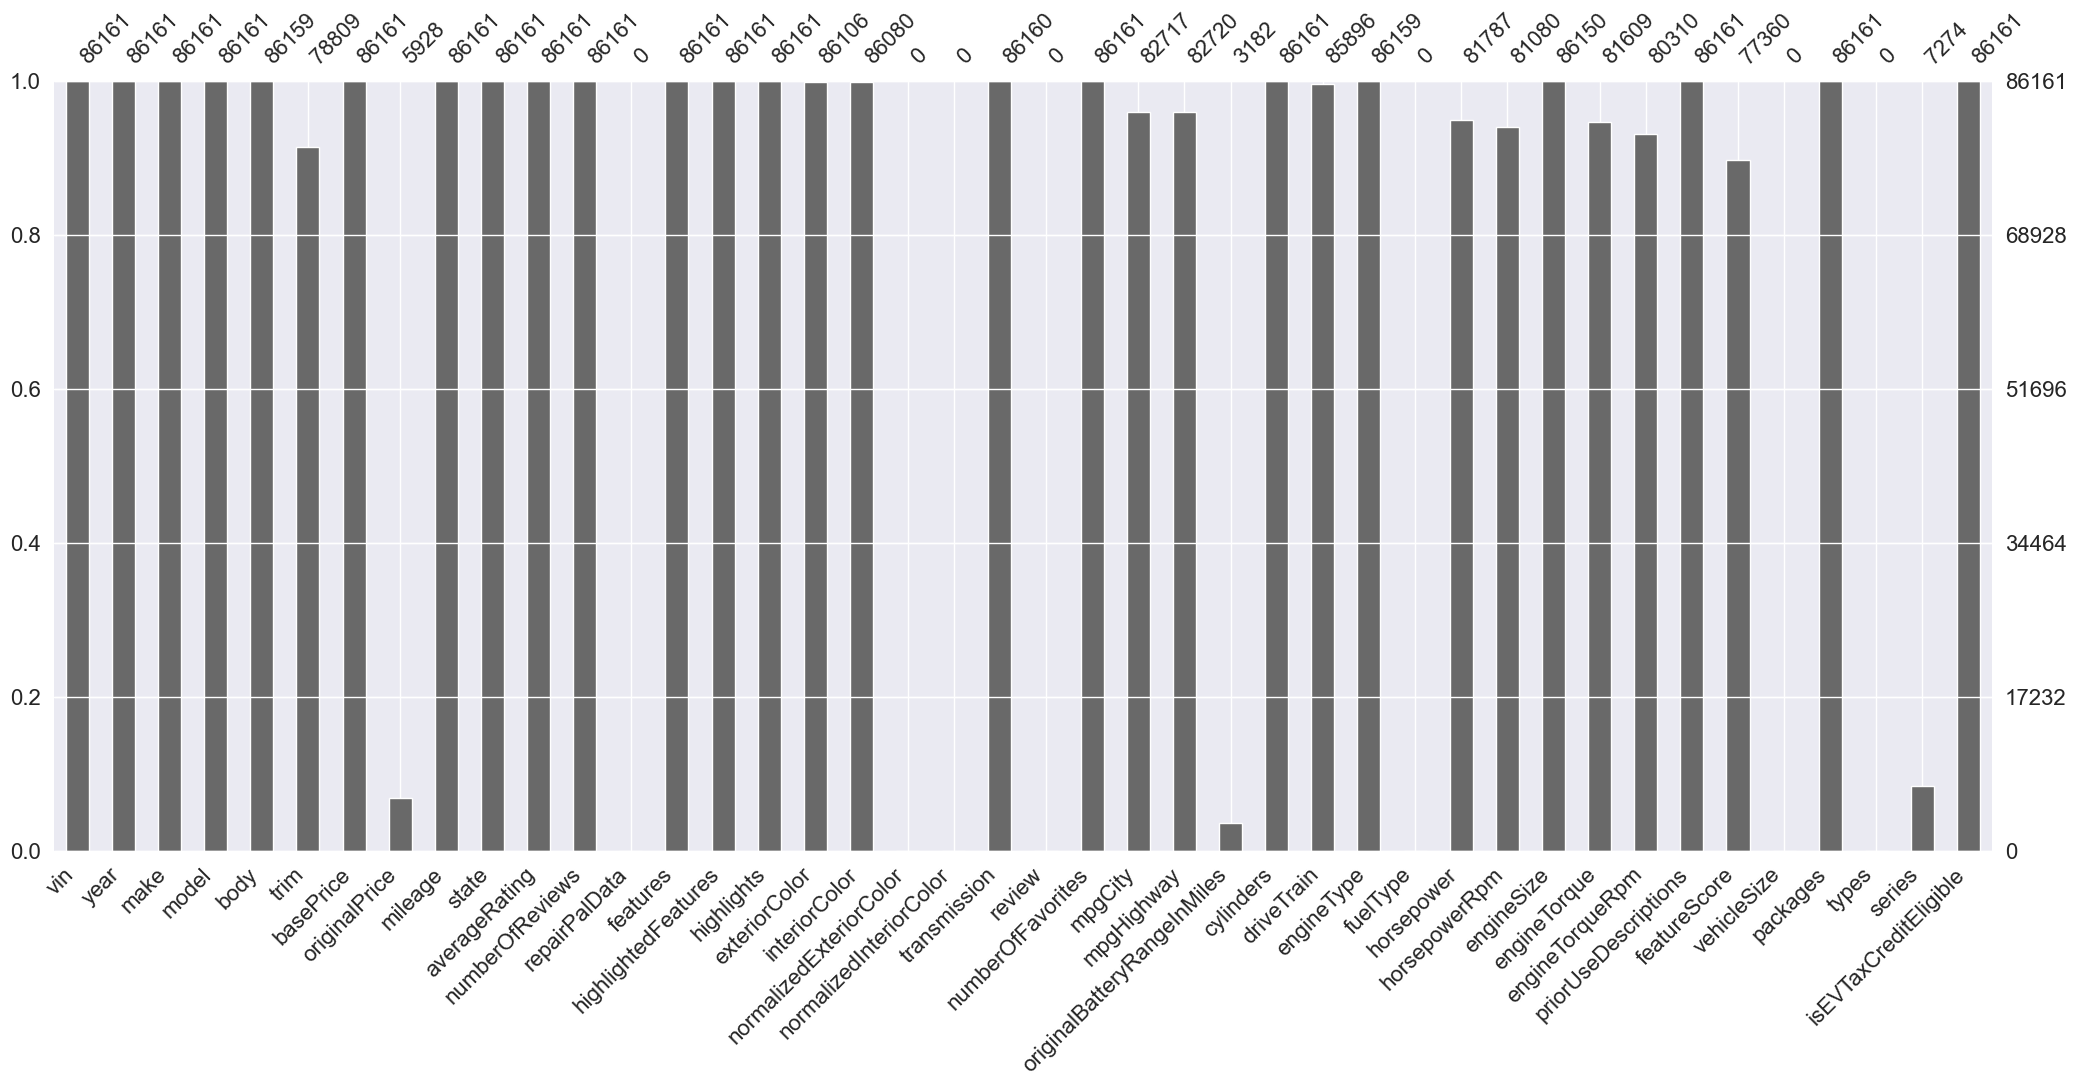

In [6]:
# Check using missingno package
msno.bar(df)

In [7]:
# Use method to display a list of missing values and their percentages

# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 

def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)
    
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [8]:
# Apply missing values table method on the dataframe
missing_vals = missing_values_table(df)
missing_vals

Your selected dataframe has 42 columns.
There are 25 columns that have missing values.


,Missing Values,% of Total Values
review,86161,100.00
repairPalData,86161,100.00
types,86161,100.00
vehicleSize,86161,100.00
normalizedExteriorColor,86161,100.00
normalizedInteriorColor,86161,100.00
fuelType,86161,100.00
originalBatteryRangeInMiles,82979,96.31
originalPrice,80233,93.12
series,78887,91.56


Based on the MissingNo package visualization and the generated table of missing values with their respective percentages we can note the following:

- the review, repairPalData, types, vehicleSize, normalizedExteriorColor, normalizedInteriorColor, and fuelType features have 100% missing values
- the originalBatteryRangeInMiles, originalPrice, and series columns have over 90% of their values missing

The following observations can be made as well:

- although the normalizedExteriorColor and normalizedExteriorColor are a good idea to keep in mind, for the purpose of this analysis they can be removed
- is it important to point out that the originalBatteryRangeInMiles probably only applies to electric vehicles

**These features can be safely removed from the dataframe**

Furthermore the missing values for the following features have less than 1% of missing values: 
- driveTrain, interiorColor, exteriorColor, engineSize, engineType, body, and transmission
- since rows with less than 5% null values can generally be dropped, **these features can be dropped from the analysis**

Other features hovering around the 5% null value mark are:
- mpgHighway, mpgCity, horsepower, engineTorque, horsepowerRpm and engineTorqueRpm values
- these features require further exploration to better understand the impact dropping them will have

In [9]:
# Remove missing values features
missing_value_features = [
    'review', 'repairPalData', 'types', 'vehicleSize', 
    'normalizedExteriorColor', 'normalizedInteriorColor', 'fuelType',
    'originalBatteryRangeInMiles', 'originalPrice', 'series'
]

df = df.drop(columns = missing_value_features, axis = 1)

# Remove missing value rows for the following features
missing_value_rows = [
    'driveTrain', 'interiorColor', 'exteriorColor', 'engineSize', 'engineType', 'body', 'transmission'
]

df.dropna(subset=missing_value_rows, how='any',inplace=True)

print("DataFrame Shape:", df.shape)

DataFrame Shape: (85751, 32)


<Axes: >

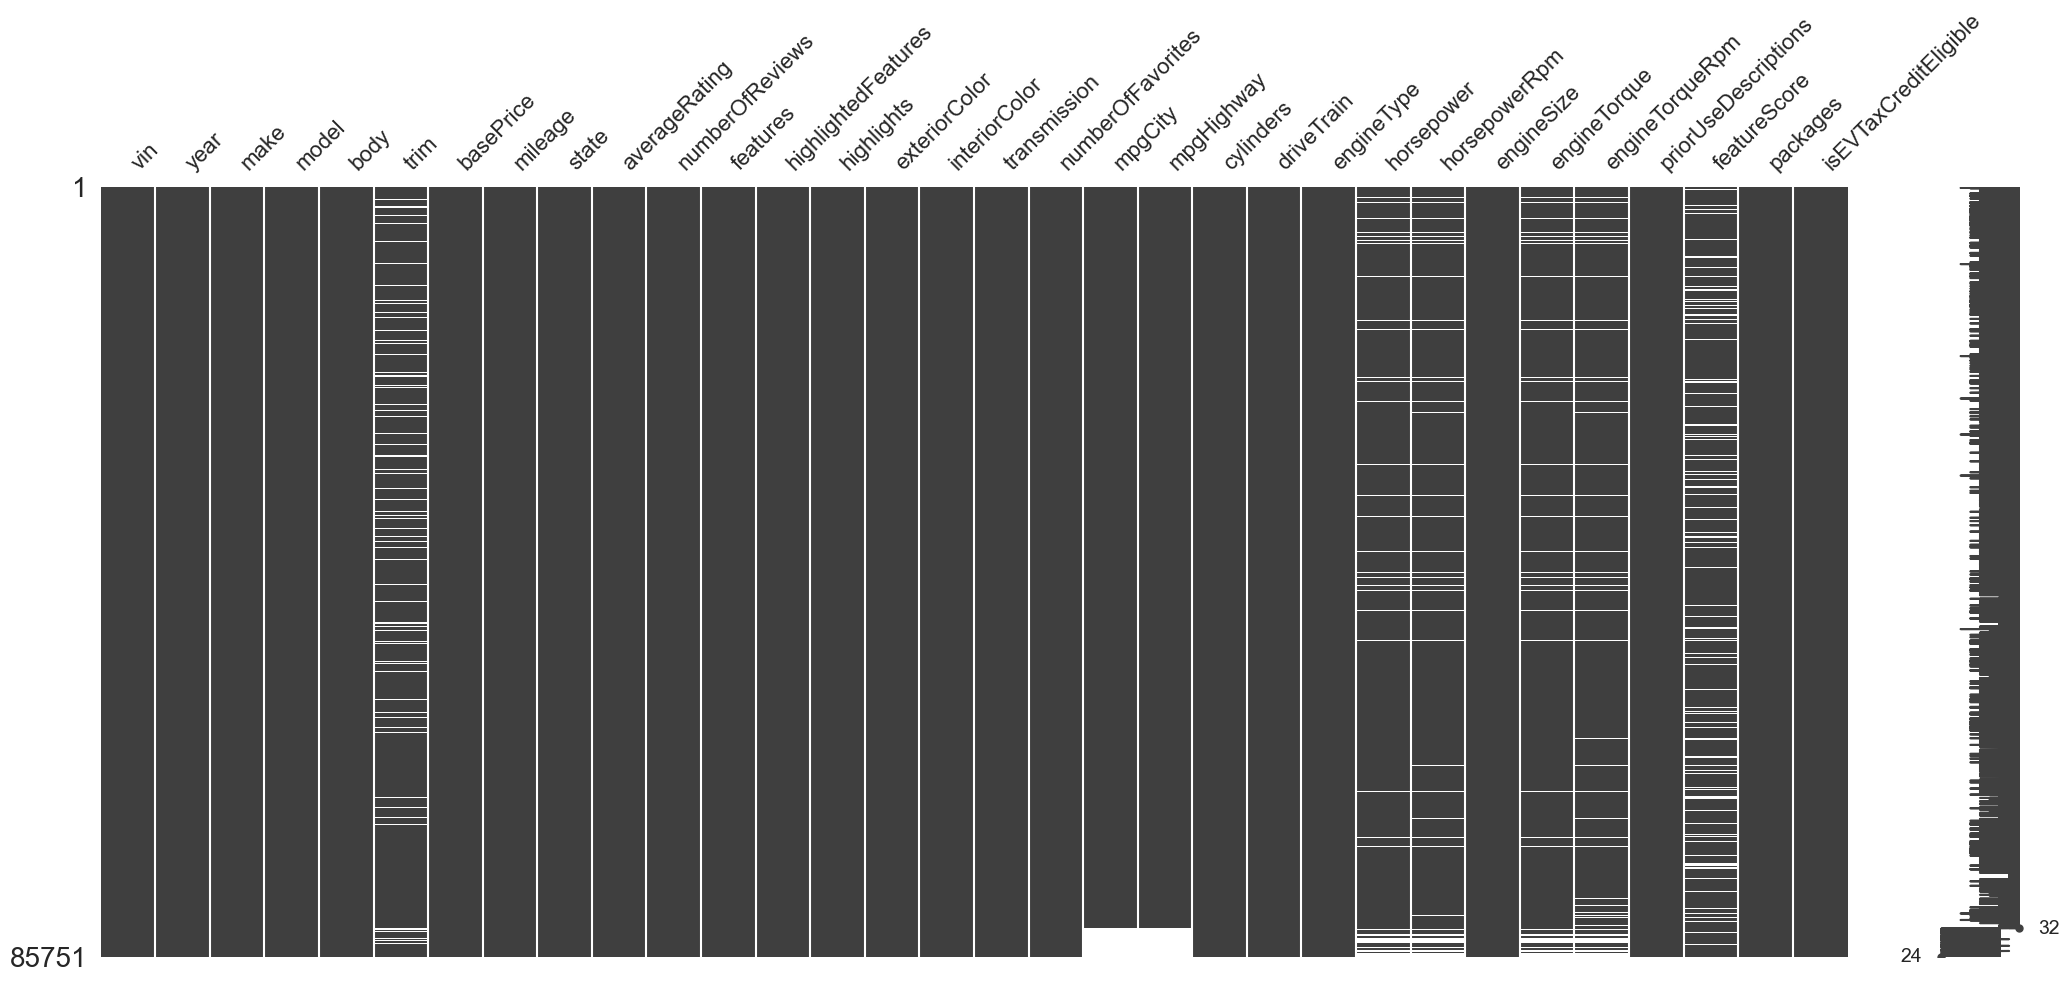

In [10]:
# Check the remaining missing values with the missingno matrix, sorting by the mpg feature columns
sorted_mpg = df.sort_values('mpgCity')
msno.matrix(sorted_mpg)

Looking at the matrix of missing values generated above we can see the following:

- the mpgCity and mpgHighway columns are highly 100% correlated
- the horsepower, horsepowerRpm, engineTorque, and engineTorqueRpm columns appear to be correlated as well
- the trim and featureScore columns seem to be missing at random

It could be that the mpgCity and mpgHighway columns are missing for the electric vehicles (EVs) in the dataframe

### Exploring Missing Values by Engine Type

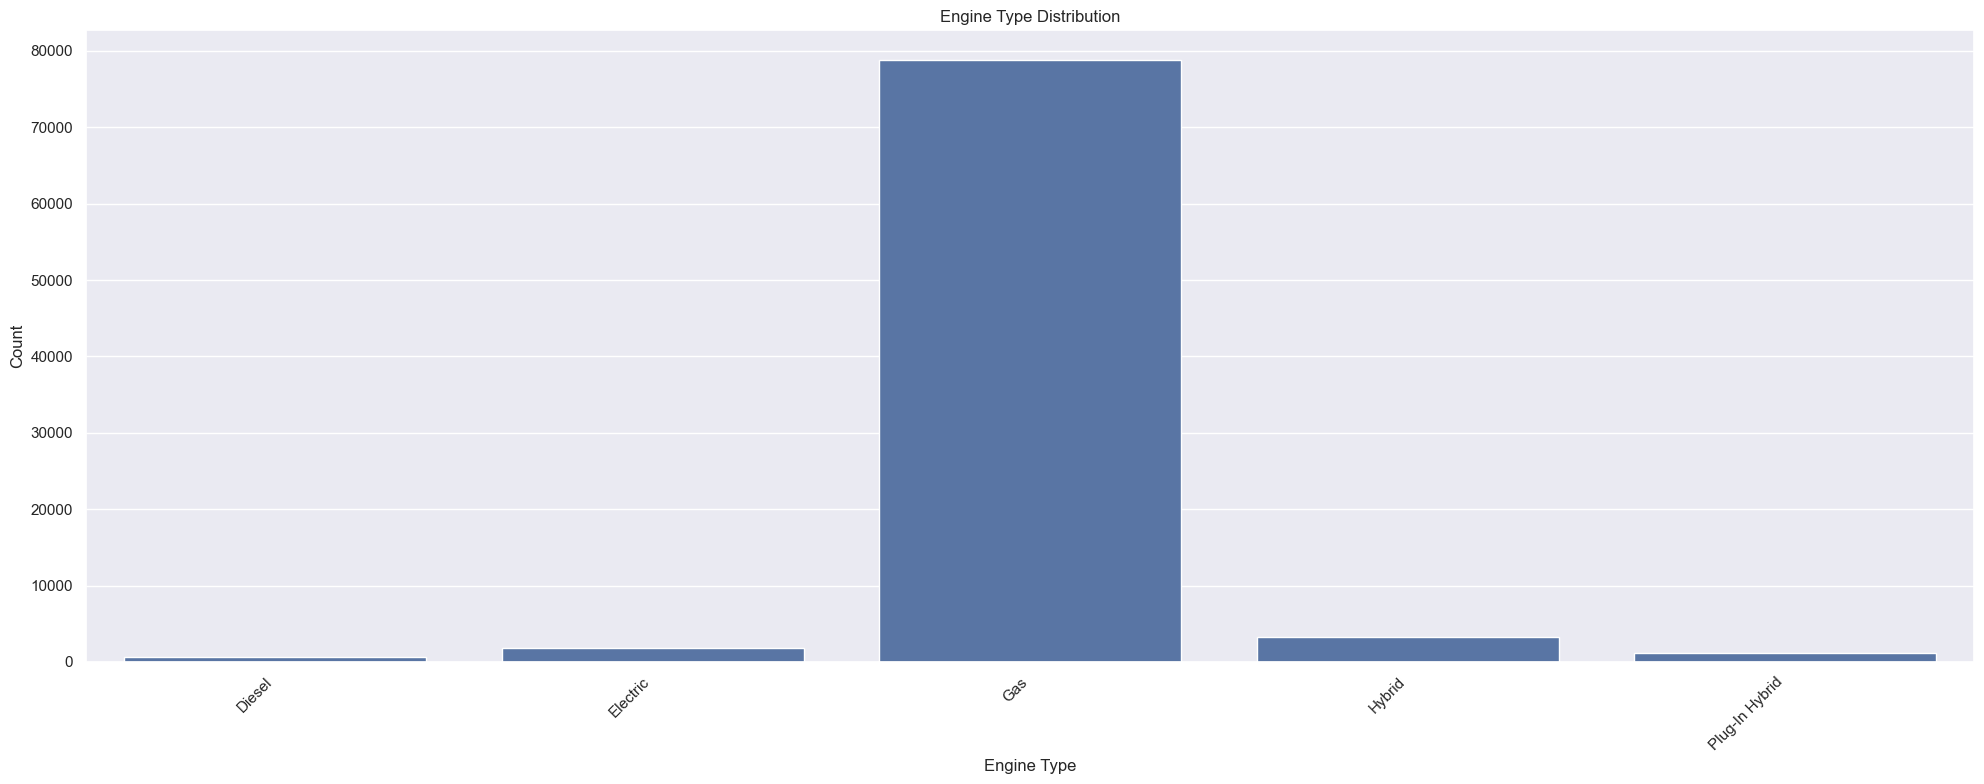

In [11]:
# Check the distribution of engineType feature
plt.figure(figsize = (20, 8))
sns.countplot(x = 'engineType', data=df, order = sorted(df['engineType'].unique()))
plt.title('Engine Type Distribution')
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()


### Make dataframes only consist of features with missing values

In [12]:
# Make dataframe that only consists of missing values
# Select specific columns
missing_value_columns = [
    'featureScore', 'trim', 'engineTorqueRpm', 'horsepowerRpm',
    'engineTorque', 'horsepower', 'mpgCity', 'mpgHighway', 'engineType'
]
missing_values_df = df[missing_value_columns]

# Create a dataframes for each engine type
dieselDf = missing_values_df[missing_values_df['engineType'] == 'Diesel']
print("dieselDf Shape:", dieselDf.shape)

electricDf = missing_values_df[missing_values_df['engineType'] == 'Electric']
print("electricDf Shape:", electricDf.shape)

gasDf = missing_values_df[missing_values_df['engineType'] == 'Gas']
print("gasDf Shape:", gasDf.shape)

hybridDf = missing_values_df[missing_values_df['engineType'] == 'Hybrid']
print("hybridDf Shape:", hybridDf.shape)

pluginDf = missing_values_df[missing_values_df['engineType'] == 'Plug-In Hybrid']
print("pluginDf Shape:", pluginDf.shape)


dieselDf Shape: (636, 9)
electricDf Shape: (1878, 9)
gasDf Shape: (78747, 9)
hybridDf Shape: (3330, 9)
pluginDf Shape: (1160, 9)


### Create Visualization for Missing Features by Engine Type

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.wa

Text(0.5, 1.0, 'Plug-In Missing Data Bar Chart')

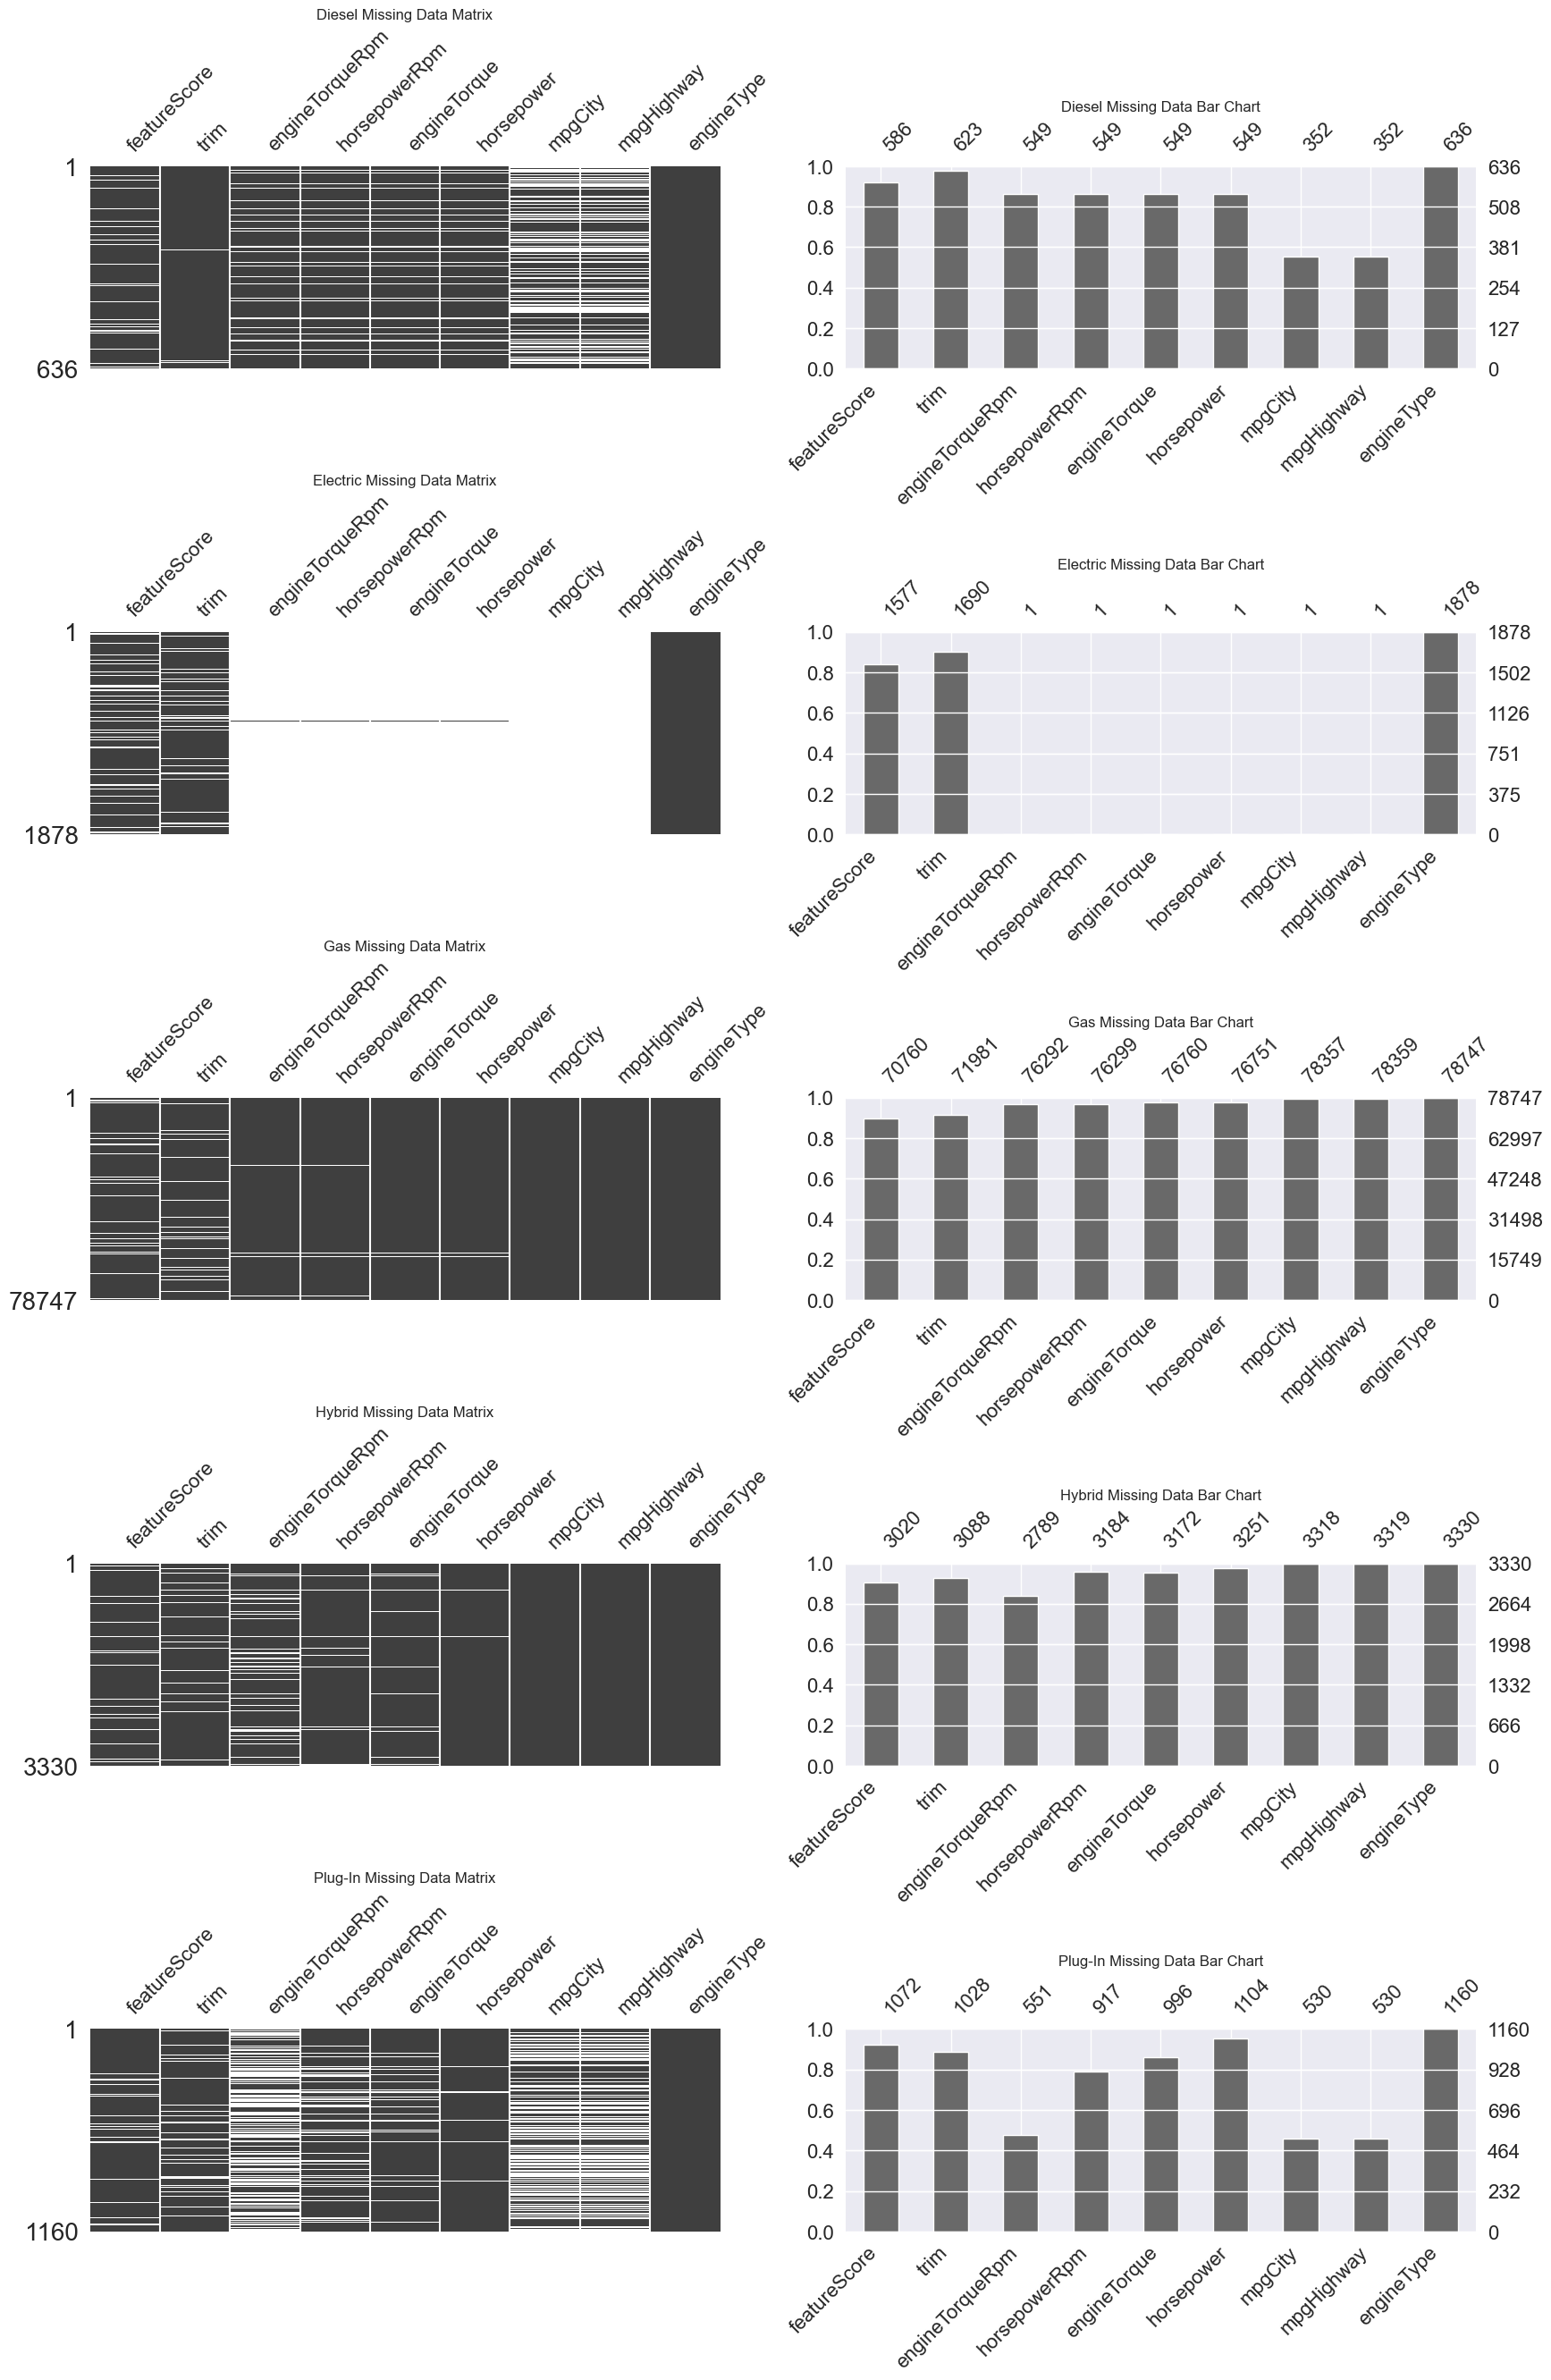

In [13]:
# Create the figure and subplots
fig, axes = plt.subplots(5, 2, figsize=(20, 30)) 
plt.subplots_adjust(hspace=1.3)


msno.matrix(dieselDf, ax=axes[0, 0] )
axes[0, 0].set_title("Diesel Missing Data Matrix")
msno.bar(dieselDf, ax=axes[0, 1])
axes[0, 1].set_title("Diesel Missing Data Bar Chart")

msno.matrix(electricDf, ax=axes[1, 0]) 
axes[1, 0].set_title("Electric Missing Data Matrix")
msno.bar(electricDf, ax=axes[1, 1])
axes[1, 1].set_title("Electric Missing Data Bar Chart")

msno.matrix(gasDf, ax=axes[2, 0]) 
axes[2, 0].set_title("Gas Missing Data Matrix")
msno.bar(gasDf, ax=axes[2, 1])
axes[2, 1].set_title("Gas Missing Data Bar Chart")

msno.matrix(hybridDf, ax=axes[3, 0]) 
axes[3, 0].set_title("Hybrid Missing Data Matrix")
msno.bar(hybridDf, ax=axes[3, 1])
axes[3, 1].set_title("Hybrid Missing Data Bar Chart")

msno.matrix(pluginDf, ax=axes[4, 0]) 
axes[4, 0].set_title("Plug-In Missing Data Matrix")
msno.bar(pluginDf, ax=axes[4, 1])
axes[4, 1].set_title("Plug-In Missing Data Bar Chart")

The following observations can be made from the matrices and barplots above:
- The gas and hybrid engine types appear to have the least amount of missing data for the selected features (granted these engine types account for the majority of the dataset)
- the electric engine types have essentially no mpgCity or mpgHighway values listed, if we were to drop rows with missing values in these columns, that would effectively eliminate all EV vehicles from the dataset
- the diesel engine type has half of the mpgCity and mpgHighway values missing, but these engine types are the rarest on the market
- the plug-in hybrid engines also have half of the mpgCity and mpgHighway values missing, as well as half of the engineTorqueRpm values

At this point in the analysis it makes sense to eliminate the rows with missing values in all of the features shown above other thanexcept featureScore and trim, which require further exploration. This will allow the diesel, hybrid, and plug-in hybrid engines to have some form of representation, but electric vehicles will be completely removed. This will allow us to examine feature importance in the modeling process later on, providing a better understanding of whether or not these features should be included in the predictive model.

Since the majority of EVs are being removed from the dataset, it makes sense to drop the isEVTaxCreditEligible feature as well. This feature will make more sense to include down the road if more EVs are incorporated into the analysis.

In [40]:
# Remove missing value rows for the following features
missing_value_rows_2 = [
    'engineTorqueRpm', 'horsepowerRpm', 'engineTorque', 'horsepower', 
    'mpgCity', 'mpgHighway', 'engineType'
]
df.dropna(subset=missing_value_rows_2, how='any', inplace=True)

# Remove isEVTaxCreditEligible
df = df.drop(columns = ['isEVTaxCreditEligible'], axis = 1)
print("DataFrame Shape:", df.shape)

DataFrame Shape: (79112, 31)


### Check Datatypes for Remaining Features

In [41]:
# Check data type of all features
pd.set_option('display.max_rows', 69)
df.dtypes

vin                      object
year                      int64
make                     object
model                    object
body                     object
trim                     object
basePrice                 int64
mileage                   int64
state                    object
averageRating           float64
numberOfReviews           int64
features                 object
highlightedFeatures      object
highlights               object
exteriorColor            object
interiorColor            object
transmission             object
numberOfFavorites         int64
mpgCity                 float64
mpgHighway              float64
cylinders                 int64
driveTrain               object
engineType               object
horsepower              float64
horsepowerRpm           float64
engineSize               object
engineTorque            float64
engineTorqueRpm         float64
priorUseDescriptions     object
featureScore            float64
packages                 object
dtype: o

## To Dos

- get the list of datatypes for the remaining features
- drop certain features being analyzed in a different notebook maybe
- create a correlation matrix for the numeric features
- examine the distributions of make and year maybe
- get the amount of models each brand (make) has